# 칼로리 소모량 예측 머신러닝 모델

In [13]:
!pip install pandas scikit-learn matplotlib tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-no

In [14]:
import pandas as pd

# 데이터 로드
data_path = "gym_members_exercise_tracking.csv"
data = pd.read_csv(data_path)

# 데이터의 첫 몇 행 확인
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [15]:
# 데이터 기본 정보 확인
data.info()

# 기술 통계 확인
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


## 2. 데이터 전처리 및 특징 선택
칼로리 소모량과 관련이 있는 주요 특징만 선택하여 모델을 학습합니다.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = pd.read_csv("gym_members_exercise_tracking.csv")

# 주요 특징 및 타깃 변수 선택
selected_features = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
    'Session_Duration (hours)', 'Fat_Percentage',
    'Water_Intake (liters)', 'Workout_Frequency (days/week)'
]
target = 'Calories_Burned'

# 특성과 타깃 변수 분리
X = data[selected_features]
y = data[target]

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. 모델 선택 및 학습
선형 회귀 모델을 사용하여 칼로리 소모량을 예측합니다.

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 생성
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 요약 출력
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 학습

In [43]:
# 모델 학습
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 866924.1875 - mae: 890.9329 - val_loss: 919708.9375 - val_mae: 923.5605
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 873885.8750 - mae: 892.7551 - val_loss: 916311.8125 - val_mae: 921.7811
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 866012.6250 - mae: 892.5667 - val_loss: 910767.1875 - val_mae: 918.8994
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 874777.6250 - mae: 898.4915 - val_loss: 901965.8750 - val_mae: 914.3654
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 891467.0625 - mae: 904.9899 - val_loss: 888832.6250 - val_mae: 907.6219
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 821907.5625 - mae: 867.7628 - val_loss: 870013.2500 - val_mae: 897.9264
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 816347.8750 - mae: 864.9686 - val_loss: 843716.5000 - val_mae: 884.3251
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 774993.1875 - mae: 841.3

## 5. 모델 평가

In [44]:
# 모델 평가
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# 예측 값 생성
y_pred = model.predict(X_test_scaled)

Mean Absolute Error (MAE): 67.55
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## 6. 결과 시각화
예측 값과 실제 값을 비교하여 모델의 성능을 시각화합니다.

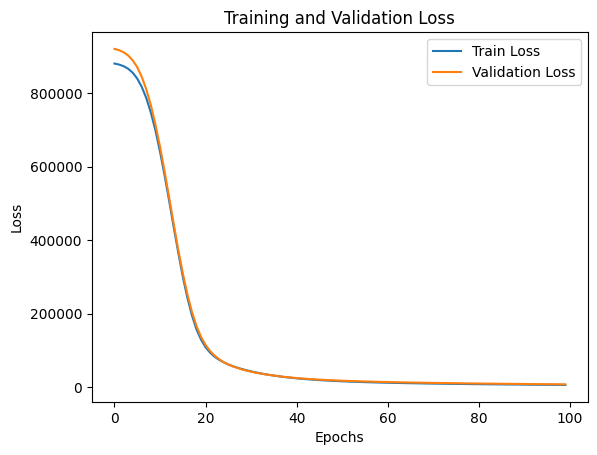

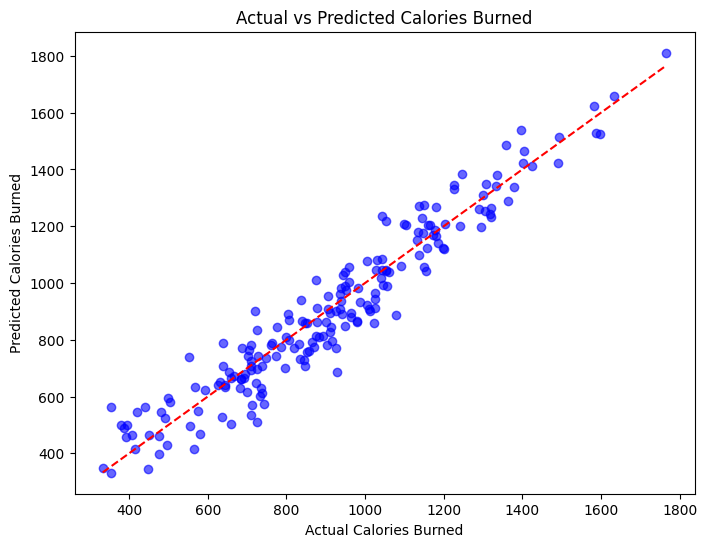

In [45]:
import matplotlib.pyplot as plt

# 학습 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 예측 vs 실제 값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs Predicted Calories Burned')
plt.show()


# 7. ChatGPT 활용 내역


In [46]:
from IPython.display import Image, display

# 이미지 표시
image_path_1 = '/Users/junseo/PycharmProjects/ML_health/주제선정_1.png'
image_path_2 = '/Users/junseo/PycharmProjects/ML_health/주제선정_2.png'
image_path_3 = '/Users/junseo/PycharmProjects/ML_health/주제선정_3.png'


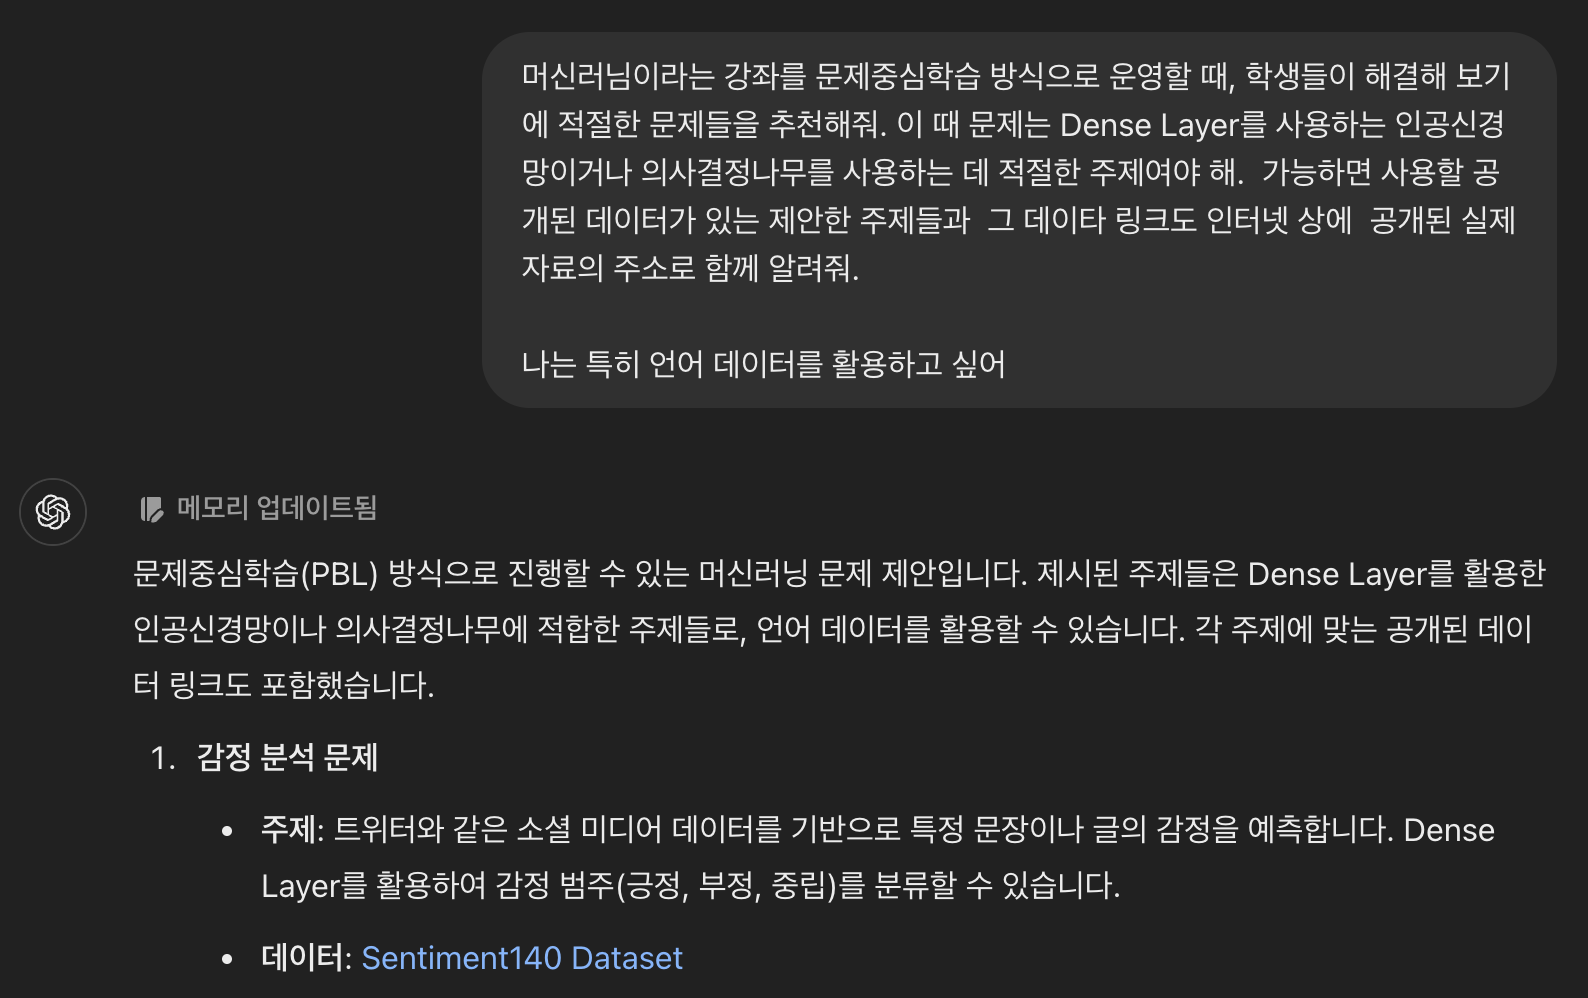

In [47]:
display(Image(filename=image_path_1))

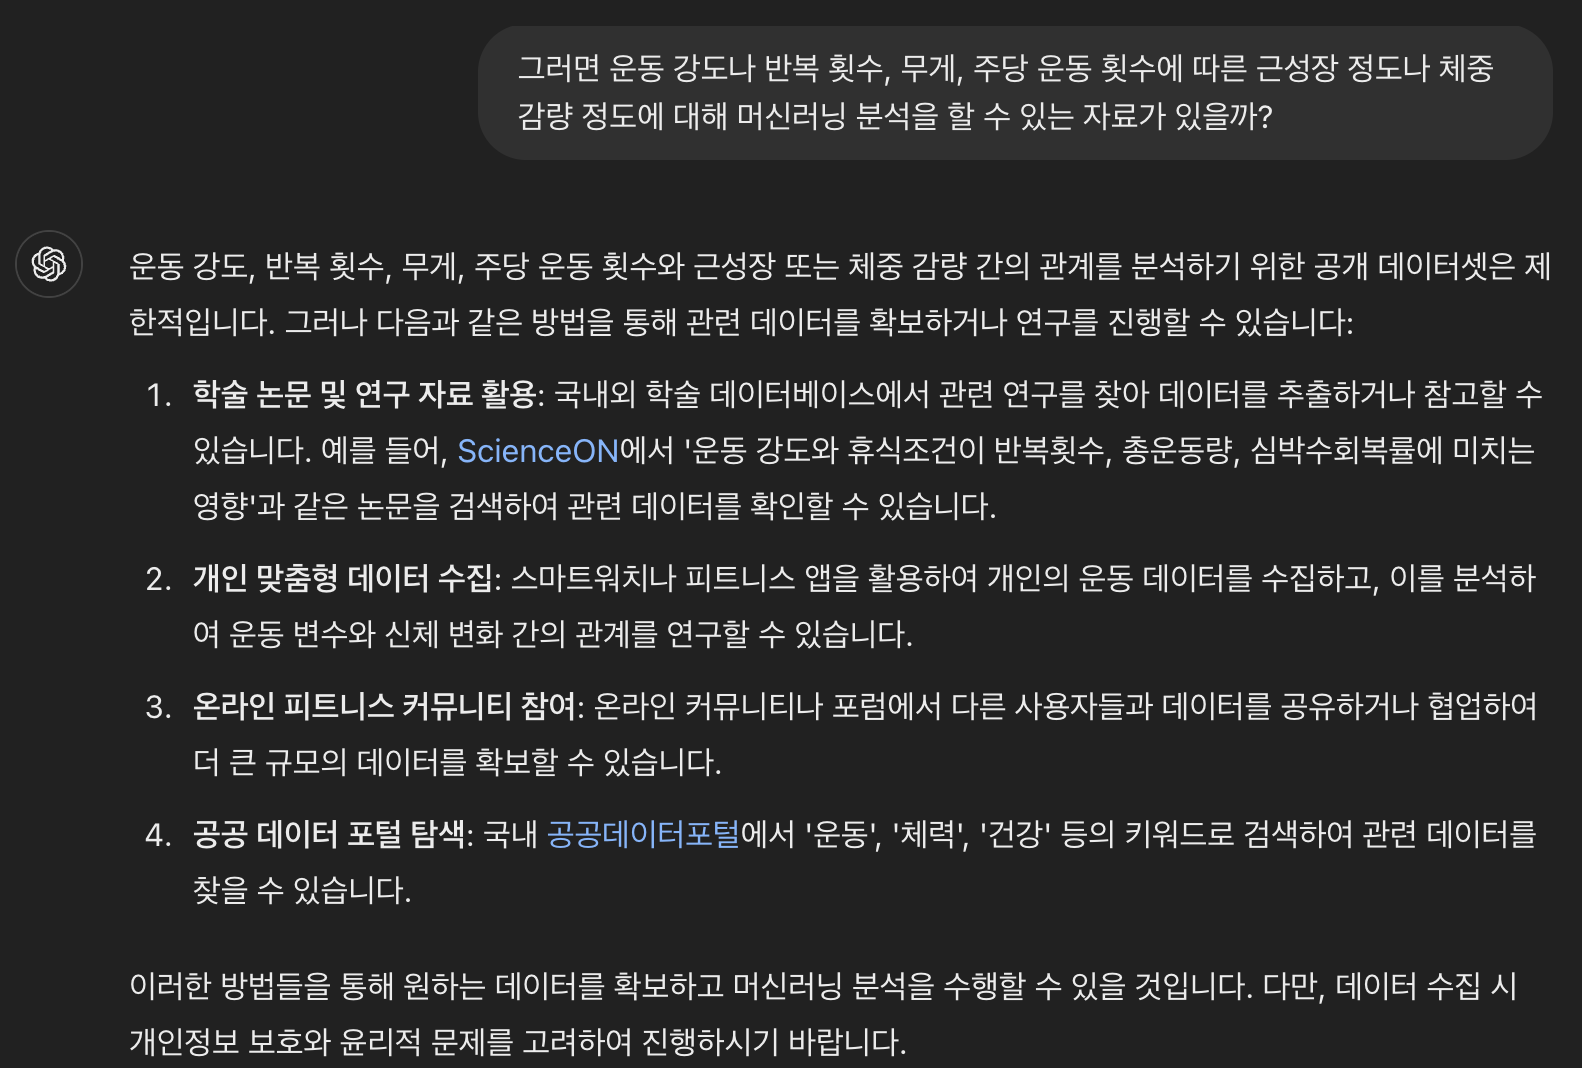

In [48]:
display(Image(filename=image_path_2))

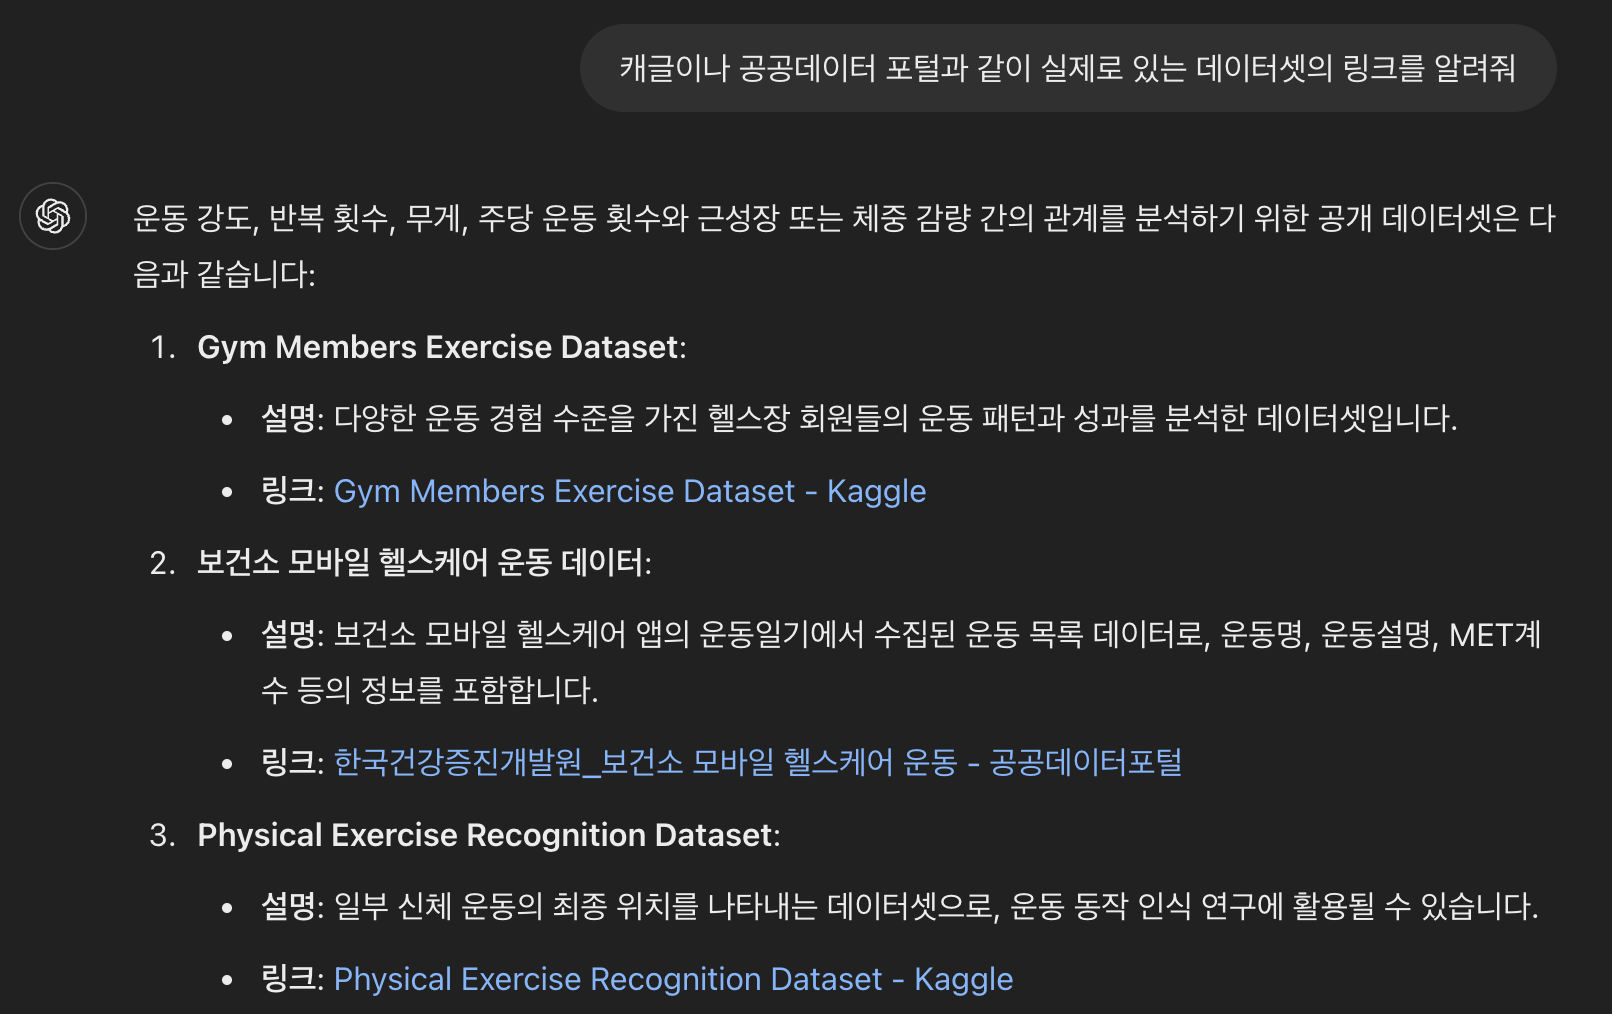

In [49]:
display(Image(filename=image_path_3))